# Figure S1 & S2

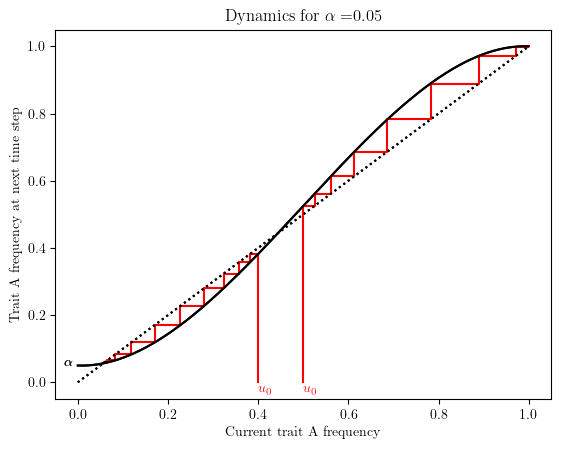

In [2]:
from matplotlib import rc
from matplotlib import rcParams
from matplotlib import pyplot as plt
from cobweb.cobweb import cobweb_plot
import numpy as np

rc('text', usetex=True)
rcParams['font.family'] = 'garamond'

def plotter(α,x0):
    def f(x):
        return min(x + x*(1 - x)*(2*x - 1) + α*(1 - x),1)

    xt, func_plot, lin_plot = cobweb_plot(f,
                                              x0=x0,
                                              num_iter=500)

    plt.plot(*xt, color='red')
    plt.plot(*func_plot, color='black')
    plt.plot(*lin_plot, ":",color='black')
    plt.xlabel("Current trait A frequency")
    plt.annotate(r"$u_0$",(x0,-.03),color="red")
    plt.annotate(r"$\alpha$",(-.03,α),color="black")
    plt.ylabel("Trait A frequency at next time step")
    plt.title(r"Dynamics for $\alpha=$" + str(α))

α = .05
plotter(α,.40)
plotter(α,.5)
plt.savefig("/Users/benoit2c/Downloads/dynamics_0.05.jpg")

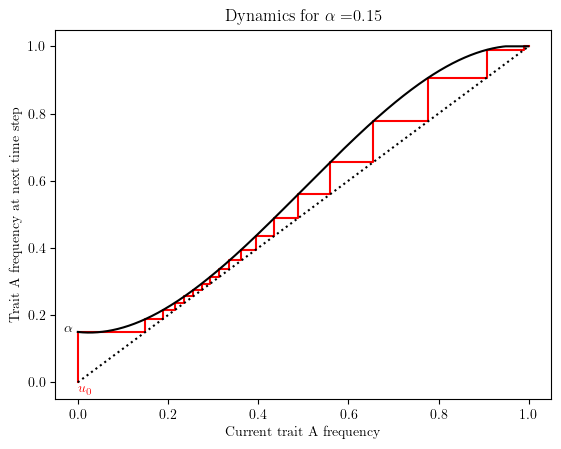

In [10]:
α = .15
plotter(α,0)
plt.savefig("/Users/benoit2c/Downloads/dynamics_0.15.jpg")

# Figure 1

/var/folders/3v/35ydjj25615c28cxm2v4xytc0000gn/T/ipykernel_67987/2557064811.py:11: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(A,[1/4 + np.sqrt(1-8*α)/4 for α in A],":",color="black",label="Unstable equilibria")
/var/folders/3v/35ydjj25615c28cxm2v4xytc0000gn/T/ipykernel_67987/2557064811.py:12: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(A,[1/4 - np.sqrt(1-8*α)/4 for α in A],"--",color="black")


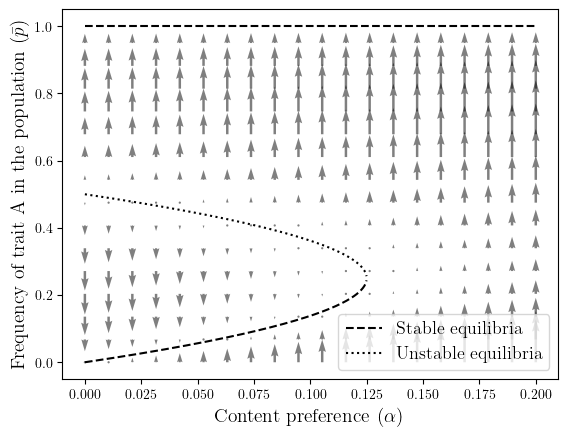

In [2]:

def f(x,α):
    return min(x*(1 - x)*(2*x - 1) + α*(1 - x),1-x)
Y = np.linspace(0,.95,15)
A = np.linspace(0,.2,20)
for α in A:
    plt.quiver([α for i in range(len(Y))], Y, [0 for i in range(len(Y))],np.array([f(y,α) for y in Y]).clip(-.3,.3),
               width=.005,scale= 2.3,alpha=.5)

A = np.linspace(0,.2,1000)    
plt.plot(A,[1 for α in A],"--",color="black",label="Stable equilibria")
plt.plot(A,[1/4 + np.sqrt(1-8*α)/4 for α in A],":",color="black",label="Unstable equilibria")
plt.plot(A,[1/4 - np.sqrt(1-8*α)/4 for α in A],"--",color="black")
plt.legend(loc="lower right",prop={'size': 13})
plt.xlabel(r"Content preference ($\alpha$)",fontdict={"fontsize":14})
plt.ylabel(r"Frequency of trait A in the population ($\bar p$)",fontdict={"fontsize":14})
plt.savefig("/Users/benoit2c/Downloads/vectorfield.png",dpi=300)

# Figure S3, S4 & Figure 2 (the last two are the same)

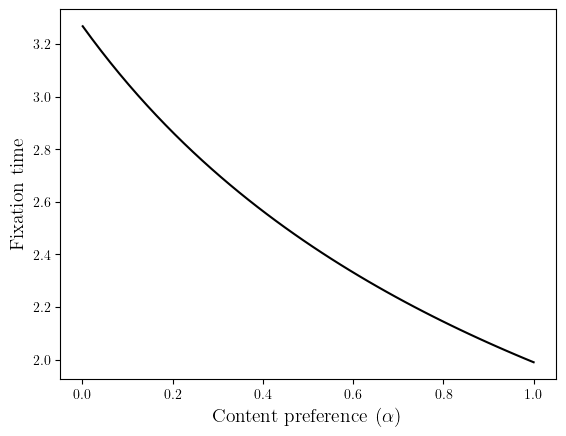

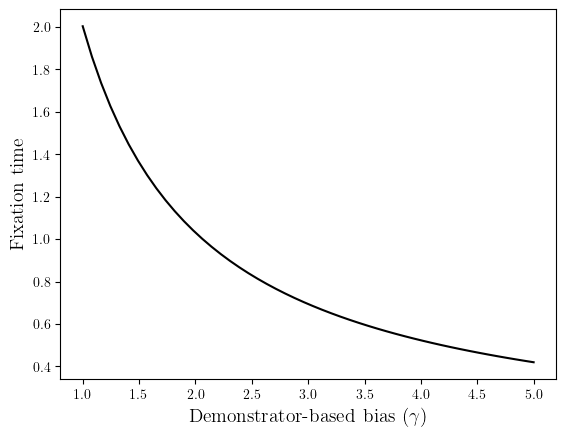

In [3]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np


def mean_fixation_time(x,v):
    def f(y):
        return (1-(1-y)**v)/y
    def f2(y):
        return (1-y)**v/y
    return 2/v*quad(f, 0, x)[0] + 2/v*(1-(1-x)**v)/(1-x)**v*quad(f2,x,1)[0]



X = np.linspace(.001,1)
plt.plot(X,[mean_fixation_time(.99,v) for v in X],color="black")
plt.xlabel(r"Content preference ($\alpha$)",fontdict={"fontsize":14})
plt.ylabel("Fixation time",fontdict={"fontsize":14})
plt.show()
v = .1
plt.plot(np.linspace(1,5),[mean_fixation_time(.5,v/σ)/σ for σ in np.linspace(1,5)],color="black")
plt.xlabel(r"Demonstrator-based bias ($\gamma$)",fontdict={"fontsize":14})
plt.ylabel("Fixation time",fontdict={"fontsize":14})
plt.savefig("/Users/benoit2c/Downloads/time_bias.png",dpi=300)
#plt.plot(X,[2*np.exp(-x) for x in X])